![title](.\images\DSA-Logo.png)

# <font color='black'>Projeto:</font> <font color='blue'>Prevendo o Nível de Satisfação dos Clientes do Santander.</font>

## <font color='black'>Data:</font> <font color='blue'>Maio, 2020</font>

## <font color='black'>Cientista de Dados:</font> <font color='blue'>Walter Trevisan</font>

## 03- Explore The Data (`Step 05`)

Nesta etapa, vamos continuar a nossa **`Análise Exploratória`** dos dados, utilizando o dataset de treinamento que foi preparado na etapa anterior (**`02-Get-The-Data`**), ou seja, o *data frame* que foi salvo no arquivo **`santander_train.pickle`**.

Então, vamos realizar as seguintes atividades:

1. Carregar o *data frame* de treinamento, salvo no arquivo **`santander_train.pickle`**;


2. Restaurar as informações (objetos) importantes criados e/ou alterados nas etapas **`Step 01`**, **`Step 02`**, **`Step 03`** e **`Step 04`** da nossa análise exploratória;


3. Estudar cada atributo/feature e suas características (entender as informações e os tipos de dados), verificando também possíveis valores ausentes (**`Missing Values = NaN`**) e possíveis **`Outliers`**;


4. Fazer um `Resumo` das informações obtidas nas etapas da nossa `Análise Exploratória`;


5. Salvar informações (objetos) importantes criados e/ou alterados durante todas as etapas da nossa `Análise Exploratória` dos dados.

## Setup

In [1]:
# As novas versões do Pandas e Matplotlib trazem diversas mensagens de aviso ao desenvolvedor.
# Então, vamos desativar essas mensagens.
import sys # O pacote "sys" permite manipulações com o sistema operacional:
import os  # Operation System (Packages and Functions)
import warnings
import matplotlib.cbook
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)

# Common imports:
import numpy as np    # NumPy
import pandas as pd   # Pandas

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
# Importa o pacote "seaborn"
import seaborn as sns

# Definindo o diretório raiz (Root) onde serão armazenados todas as informações
# (Imagens, Objetos, Dados, Modelos de ML, etc...) do projeto.
# Diretório Raiz (Root) do Projeto:
PROJECT_ROOT_DIR = "."

# Path: onde serão armazenadas as "Imagens" (Figuras e Gráficos) desta Fase do Projeto:
PROJECT_IMG_PATH = os.path.join(PROJECT_ROOT_DIR, "Images", "03-Explore_The_Data")
# Criando o diretório, se ele não existir:
os.makedirs(PROJECT_IMG_PATH, exist_ok=True)

# Path: onde ficarão armazenados os "Objetos" (Estrututras de Dados) relacionados ao Projeto:
PROJECT_OBJ_PATH = os.path.join(PROJECT_ROOT_DIR, "Objects")
# Criando o diretório, se ele não existir:
os.makedirs(PROJECT_OBJ_PATH, exist_ok=True)

# Path: onde ficarão armazenados os "datasets" (arquivos "csv") e os "Objetos" (Data Frames) do Projeto:
PROJECT_DATA_PATH = os.path.join(PROJECT_ROOT_DIR, "Data")
# Criando o diretório, se ele não existir:
os.makedirs(PROJECT_DATA_PATH, exist_ok=True)

# Path: onde estão armazenadas as classes e funções que serão utilizadas neste notebook:
PROJECT_LIB_PATH = os.path.join(PROJECT_ROOT_DIR, "Library")

# Adicionando o diretório ao 'path' do Sistema, para podermos importar classes e funções que serão
# utilizadas neste notebook:
sys.path.append(PROJECT_LIB_PATH)

# Importando para este notebook, as classes e funções definidas no módulo "DataScience_Library_v1_0":
import DataScience_Library_v1_0 as dslib

# Importando para este notebook, as classes e funções definidas no módulo "DataScience_Plot_Library_v1_0":
import DataScience_Plot_Library_v1_0 as ptlib

# Importando para este notebook, as classes e funções definidas no módulo "DSA_Project_03_Library":
import DSA_Project_03_Library as pjlib

print("Setup Complete!")

Setup Complete!


In [2]:
# Versões dos pacotes usados neste jupyter notebook:
%reload_ext watermark
%watermark -a "Walter Trevisan" --iversions

matplotlib 3.2.1
seaborn    0.10.0
numpy      1.18.2
pandas     0.25.3
Walter Trevisan


## 01- Carregando o nosso *data frame* de treinamento: `santander_train.pickle`

In [3]:
# Carregando o objeto (data frame) "santander_train":
train_df = dslib.pickle_object_load(path=PROJECT_DATA_PATH, file="santander_train.pickle",
                                    msg="The 'santander_train' (data frame) has been successfully uploaded!")

The 'santander_train' (data frame) has been successfully uploaded!


In [4]:
# Renomeando o label "ind_var10cte_ult1", em nosso dataset, para colocá-lo no mesmo padrão das outras variáveis (features).
train_df.rename(columns={'ind_var10cte_ult1': 'ind_var10_cte_ult1'}, inplace=True)

## 02 - Restaurando informações (`objetos`) importantes que serão utilizados nesta etapa:

Primeiro, vamos restaurar/carregar os seguintes `objetos` importantes que serão utilizados nesta etapa da `Análise Exploratória`:

1. **`feat_groupby_vars`:** dicionário com as features agrupadas por tipo de variável (var1, var2, var18, etc...);

2. **`vars_groupby_featcount`:** dicionário com as variáveis (var1, var2, var18, etc...) agrupadas por quantidade (contagem) de features (Feat_1, Feat_2, Feat_3, etc...);

3. **`santander_feat_info`:** dicionário com as principais informações sobre cada uma das features, ou seja, `tipo de variável`, valores ausentes (`NaN`), valores extremos (`Outliers`) e uma lista das variáveis que não são importantes para a criação dos modelos preditivos (`Drop`).

In [5]:
# Carregando o objeto "feat_groupby_vars":
feat_groupby_vars = dslib.pickle_object_load(path=PROJECT_OBJ_PATH, file="feat_groupby_vars.pickle",
                                             msg="The 'feat_groupby_vars' object has been successfully uploaded!")

# Carregando o objeto "vars_groupby_featcount":
vars_groupby_featcount = dslib.pickle_object_load(path=PROJECT_OBJ_PATH, file="vars_groupby_featcount.pickle",
                                                  msg="The 'vars_groupby_featcount' object has been successfully uploaded!")

# Carregando o objeto "santander_feat_info":
santander_feat_info = dslib.pickle_object_load(path=PROJECT_OBJ_PATH, file="santander_feat_info.pickle",
                                               msg="The 'santander_feat_info' object has been successfully uploaded!")

The 'feat_groupby_vars' object has been successfully uploaded!
The 'vars_groupby_featcount' object has been successfully uploaded!
The 'santander_feat_info' object has been successfully uploaded!


## 03- Entendendo as informações e os tipos de dados de cada atributo (`Feature`):

## Variáveis que possuem `34 features` em nosso dataset:

In [6]:
# Verificando as variáveis que possuem "34" features (variáveis preditoras) no dataset:
feat_vars = vars_groupby_featcount['Feat_34']
print("Count of variables: {}".format(len(feat_vars)))
print(feat_vars)

Count of variables: 2
['var17', 'var33']


In [7]:
# Conferindo a contagem de features para cada variável:
feat_total = 0
for v in feat_vars:
    feat_total += len(feat_groupby_vars[v])
    
print("Count of features: {}".format(feat_total))

Count of features: 68


## var17

In [8]:
# Resumo das informações:
train_df[feat_groupby_vars['var17']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60816 entries, 0 to 60815
Data columns (total 34 columns):
delta_imp_aport_var17_1y3        60816 non-null float64
delta_imp_reemb_var17_1y3        60816 non-null int64
delta_imp_trasp_var17_in_1y3     60816 non-null int64
delta_imp_trasp_var17_out_1y3    60816 non-null int64
delta_num_aport_var17_1y3        60816 non-null float64
delta_num_reemb_var17_1y3        60816 non-null int64
delta_num_trasp_var17_in_1y3     60816 non-null int64
delta_num_trasp_var17_out_1y3    60816 non-null int64
imp_aport_var17_hace3            60816 non-null float64
imp_aport_var17_ult1             60816 non-null float64
imp_reemb_var17_hace3            60816 non-null float64
imp_reemb_var17_ult1             60816 non-null float64
imp_trasp_var17_in_hace3         60816 non-null float64
imp_trasp_var17_in_ult1          60816 non-null float64
imp_trasp_var17_out_hace3        60816 non-null int64
imp_trasp_var17_out_ult1         60816 non-null float64
ind_var17

Agora, vamos calcular algumas medidas **estatísticas descritivas** para análsise destas **`features`** em nosso dataset:

In [9]:
# Dataframe "train_df":
train_df[feat_groupby_vars['var17']].describe().T

,count,mean,std,min,25%,50%,75%,max
delta_imp_aport_var17_1y3,60816.0,5.590634e+06,2.363811e+08,-1.00,0.0,0.0,0.0,1.000000e+10
delta_imp_reemb_var17_1y3,60816.0,2.466456e+06,1.570315e+08,-1.00,0.0,0.0,0.0,1.000000e+10
delta_imp_trasp_var17_in_1y3,60816.0,6.577217e+05,8.109804e+07,-1.00,0.0,0.0,0.0,1.000000e+10
delta_imp_trasp_var17_out_1y3,60816.0,4.932912e+05,7.023354e+07,0.00,0.0,0.0,0.0,1.000000e+10
delta_num_aport_var17_1y3,60816.0,5.590634e+06,2.363811e+08,-1.00,0.0,0.0,0.0,1.000000e+10
delta_num_reemb_var17_1y3,60816.0,2.466456e+06,1.570315e+08,-1.00,0.0,0.0,0.0,1.000000e+10
delta_num_trasp_var17_in_1y3,60816.0,6.577217e+05,8.109804e+07,-1.00,0.0,0.0,0.0,1.000000e+10
delta_num_trasp_var17_out_1y3,60816.0,4.932912e+05,7.023354e+07,0.00,0.0,0.0,0.0,1.000000e+10
imp_aport_var17_hace3,60816.0,1.197763e+02,2.472546e+04,0.00,0.0,0.0,0.0,6.083692e+06
imp_aport_var17_ult1,60816.0,3.428812e+01,2.666702e+03,0.00,0.0,0.0,0.0,4.324573e+05


In [10]:
# Obtendo os percentis a partir de "95%", com intervá-los de "1%":
result = dslib.get_features_percentiles(data=train_df, features=feat_groupby_vars['var17'], percent_range=range(95, 101, 1))
result.T

Percentile,95%,96%,97%,98%,99%,100%
delta_imp_aport_var17_1y3,0.0,0.0,0.0,0.0,0.0,1.000000e+10
delta_imp_reemb_var17_1y3,0.0,0.0,0.0,0.0,0.0,1.000000e+10
delta_imp_trasp_var17_in_1y3,0.0,0.0,0.0,0.0,0.0,1.000000e+10
delta_imp_trasp_var17_out_1y3,0.0,0.0,0.0,0.0,0.0,1.000000e+10
delta_num_aport_var17_1y3,0.0,0.0,0.0,0.0,0.0,1.000000e+10
delta_num_reemb_var17_1y3,0.0,0.0,0.0,0.0,0.0,1.000000e+10
delta_num_trasp_var17_in_1y3,0.0,0.0,0.0,0.0,0.0,1.000000e+10
delta_num_trasp_var17_out_1y3,0.0,0.0,0.0,0.0,0.0,1.000000e+10
imp_aport_var17_hace3,0.0,0.0,0.0,0.0,0.0,6.083692e+06
imp_aport_var17_ult1,0.0,0.0,0.0,0.0,0.0,4.324573e+05


In [11]:
# Vamos verificar a proporção dos valores para as variáveis relacionadas a "var17":
for feat in feat_groupby_vars['var17']:
    print(dslib.percent_count_feature(df=train_df, feature=feat, lines_drop=False))
    print()

                           Total  Percent
delta_imp_aport_var17_1y3                
 0.000000e+00              60767   0.9992
 1.000000e+10                 34   0.0006
-1.000000e+00                 14   0.0002
 1.500000e+00                  1   0.0000

                           Total  Percent
delta_imp_reemb_var17_1y3                
 0                         60800   0.9997
 9999999999                   15   0.0002
-1                             1   0.0000

                              Total  Percent
delta_imp_trasp_var17_in_1y3                
 0                            60810   0.9999
 9999999999                       4   0.0001
-1                                2   0.0000

                               Total  Percent
delta_imp_trasp_var17_out_1y3                
0                              60813      1.0
9999999999                         3      0.0

                           Total  Percent
delta_num_aport_var17_1y3                
 0.000000e+00              60768   0.9992

**Análise:**

1. As features **`ind_var17`** e **`ind_var17_0`** são variáveis do tipo `Categóricas Nominais Binárias`, ou seja, com apenas duas classes **`0`** e **`1`**;

2. A feature **`num_meses_var17_ult3`** é uma variável do tipo `Categórica Nominal` com quatro categorias **`0`**, **`1`**, **`2`** e **`3`**;

3. As features **`num_aport_var17_hace3`**, **`num_aport_var17_ult1`**, **`num_reemb_var17_hace3`**, **`num_reemb_var17_ult1`**, **`num_trasp_var17_in_hace3`**, **`num_trasp_var17_in_ult1`**, **`num_trasp_var17_out_hace3`**, **`num_trasp_var17_out_ult1`**, **`num_var17`** e **`num_var17_0`** são variáveis do tipo `Quantitativas Discretas`;

4. As features **`delta_imp_aport_var17_1y3`**, **`delta_imp_reemb_var17_1y3`**, **`delta_imp_trasp_var17_in_1y3`**, **`delta_imp_trasp_var17_out_1y3`**, **`delta_num_aport_var17_1y3`**, **`delta_num_reemb_var17_1y3`**, **`delta_num_trasp_var17_in_1y3`**, **`delta_num_trasp_var17_out_1y3`**, **`imp_aport_var17_hace3`**, **`imp_aport_var17_ult1`**, **`imp_reemb_var17_hace3`**, **`imp_reemb_var17_ult1`**, **`imp_trasp_var17_in_hace3`**, **`imp_trasp_var17_in_ult1`**, **`imp_trasp_var17_out_hace3`**, **`imp_trasp_var17_out_ult1`**, **`saldo_medio_var17_hace2`**, **`saldo_medio_var17_hace3`**, **`saldo_medio_var17_ult1`**, **`saldo_medio_var17_ult3`** e **`saldo_var17`** são variáveis do tipo `Quantitativas Contínuas`;

Conforme mostrado nos relatórios de *proporções* e *percentis* temos:

1. Para as features **`ind_var17`** e **`ind_var17_0`**, observamos que **`99.99%`** das observações pertencem a categoria **`0`**;

2. Para a feature **`num_meses_var17_ult3`**, observamos que **`99.83%`** das observações pertencem a categoria **`0`**;

3. Para as demais features, observamos que **`99.99%`** das observações possuem valores iguais a **`0`**.

**Conclusão:** Portanto, entendemos que estas **features são `irrelevantes`** para serem analisadas na criação dos modelos preditivos.

In [12]:
# Armazenando informações sobre as features:

# Categórica Nominal Binária:
features = ['ind_var17', 'ind_var17_0']
santander_feat_info.save(key='Binary', features=features)

# Categórica Nominal:
santander_feat_info.save(key='Categorical', features=['num_meses_var17_ult3'])

# Quantitativa Discreta:
features = ['num_aport_var17_hace3', 'num_aport_var17_ult1', 'num_reemb_var17_hace3',
            'num_reemb_var17_ult1', 'num_trasp_var17_in_hace3', 'num_trasp_var17_in_ult1', 'num_trasp_var17_out_hace3',
            'num_trasp_var17_out_ult1', 'num_var17', 'num_var17_0']
santander_feat_info.save(key='Discrete', features=features)

# Quantitativa Contínua:
features = ['delta_imp_aport_var17_1y3', 'delta_imp_reemb_var17_1y3', 'delta_imp_trasp_var17_in_1y3',
            'delta_imp_trasp_var17_out_1y3', 'delta_num_aport_var17_1y3', 'delta_num_reemb_var17_1y3',
            'delta_num_trasp_var17_in_1y3', 'delta_num_trasp_var17_out_1y3', 'imp_aport_var17_hace3',
            'imp_aport_var17_ult1', 'imp_reemb_var17_hace3', 'imp_reemb_var17_ult1', 'imp_trasp_var17_in_hace3',
            'imp_trasp_var17_in_ult1', 'imp_trasp_var17_out_hace3', 'imp_trasp_var17_out_ult1', 'saldo_medio_var17_hace2',
            'saldo_medio_var17_hace3', 'saldo_medio_var17_ult1', 'saldo_medio_var17_ult3', 'saldo_var17']
santander_feat_info.save(key='Continuous', features=features)

# Features Irrelevantes:
santander_feat_info.save(key='Irrelevant', features=feat_groupby_vars['var17'])

## var33

In [13]:
# Resumo das informações:
train_df[feat_groupby_vars['var33']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60816 entries, 0 to 60815
Data columns (total 34 columns):
delta_imp_aport_var33_1y3        60816 non-null float64
delta_imp_reemb_var33_1y3        60816 non-null int64
delta_imp_trasp_var33_in_1y3     60816 non-null int64
delta_imp_trasp_var33_out_1y3    60816 non-null int64
delta_num_aport_var33_1y3        60816 non-null float64
delta_num_reemb_var33_1y3        60816 non-null int64
delta_num_trasp_var33_in_1y3     60816 non-null int64
delta_num_trasp_var33_out_1y3    60816 non-null int64
imp_aport_var33_hace3            60816 non-null int64
imp_aport_var33_ult1             60816 non-null int64
imp_reemb_var33_hace3            60816 non-null int64
imp_reemb_var33_ult1             60816 non-null int64
imp_trasp_var33_in_hace3         60816 non-null float64
imp_trasp_var33_in_ult1          60816 non-null float64
imp_trasp_var33_out_hace3        60816 non-null int64
imp_trasp_var33_out_ult1         60816 non-null int64
ind_var33          

Agora, vamos calcular algumas medidas **estatísticas descritivas** para análsise destas **`features`** em nosso dataset:

In [14]:
# Dataframe "train_df":
train_df[feat_groupby_vars['var33']].describe().T

,count,mean,std,min,25%,50%,75%,max
delta_imp_aport_var33_1y3,60816.0,164430.412768,4.055002e+07,-1.0,0.0,0.0,0.0,1.000000e+10
delta_imp_reemb_var33_1y3,60816.0,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.000000e+00
delta_imp_trasp_var33_in_1y3,60816.0,493291.239016,7.023354e+07,-1.0,0.0,0.0,0.0,1.000000e+10
delta_imp_trasp_var33_out_1y3,60816.0,164430.413033,4.055002e+07,0.0,0.0,0.0,0.0,1.000000e+10
delta_num_aport_var33_1y3,60816.0,164430.412811,4.055002e+07,-1.0,0.0,0.0,0.0,1.000000e+10
delta_num_reemb_var33_1y3,60816.0,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.000000e+00
delta_num_trasp_var33_in_1y3,60816.0,493291.239016,7.023354e+07,-1.0,0.0,0.0,0.0,1.000000e+10
delta_num_trasp_var33_out_1y3,60816.0,164430.413033,4.055002e+07,0.0,0.0,0.0,0.0,1.000000e+10
imp_aport_var33_hace3,60816.0,2.484215,2.072218e+02,0.0,0.0,0.0,0.0,3.600000e+04
imp_aport_var33_ult1,60816.0,0.034530,4.213975e+00,0.0,0.0,0.0,0.0,7.500000e+02


In [15]:
# Obtendo os percentis a partir de "95%", com intervá-los de "1%":
result = dslib.get_features_percentiles(data=train_df, features=feat_groupby_vars['var33'], percent_range=range(95, 101, 1))
result.T

Percentile,95%,96%,97%,98%,99%,100%
delta_imp_aport_var33_1y3,0.0,0.0,0.0,0.0,0.0,1.000000e+10
delta_imp_reemb_var33_1y3,0.0,0.0,0.0,0.0,0.0,0.000000e+00
delta_imp_trasp_var33_in_1y3,0.0,0.0,0.0,0.0,0.0,1.000000e+10
delta_imp_trasp_var33_out_1y3,0.0,0.0,0.0,0.0,0.0,1.000000e+10
delta_num_aport_var33_1y3,0.0,0.0,0.0,0.0,0.0,1.000000e+10
delta_num_reemb_var33_1y3,0.0,0.0,0.0,0.0,0.0,0.000000e+00
delta_num_trasp_var33_in_1y3,0.0,0.0,0.0,0.0,0.0,1.000000e+10
delta_num_trasp_var33_out_1y3,0.0,0.0,0.0,0.0,0.0,1.000000e+10
imp_aport_var33_hace3,0.0,0.0,0.0,0.0,0.0,3.600000e+04
imp_aport_var33_ult1,0.0,0.0,0.0,0.0,0.0,7.500000e+02


In [16]:
# Vamos verificar a proporção dos valores para as variáveis relacionadas a "var33":
for feat in feat_groupby_vars['var33']:
    print(dslib.percent_count_feature(df=train_df, feature=feat, lines_drop=False))
    print()

                           Total  Percent
delta_imp_aport_var33_1y3                
 0.000000e+00              60798   0.9997
-1.000000e+00                 13   0.0002
-9.500000e-01                  1   0.0000
-9.404762e-01                  1   0.0000
-7.000000e-01                  1   0.0000
-5.000000e-01                  1   0.0000
 1.000000e+10                  1   0.0000

                           Total  Percent
delta_imp_reemb_var33_1y3                
0                          60816      1.0

                              Total  Percent
delta_imp_trasp_var33_in_1y3                
 0                            60808   0.9999
-1                                5   0.0001
 9999999999                       3   0.0000

                               Total  Percent
delta_imp_trasp_var33_out_1y3                
0                              60815      1.0
9999999999                         1      0.0

                           Total  Percent
delta_num_aport_var33_1y3                

**Análise:**

1. As features **`ind_var33`** e **`ind_var33_0`** são variáveis do tipo `Categóricas Nominais Binárias`, ou seja, com apenas duas classes **`0`** e **`1`**;

2. A feature **`num_meses_var33_ult3`** é uma variável do tipo `Categórica Nominal` com quatro categorias **`0`**, **`1`**, **`2`** e **`3`**;

3. As features **`num_aport_var33_hace3`**, **`num_aport_var33_ult1`**, **`num_reemb_var33_hace3`**, **`num_reemb_var33_ult1`**, **`num_trasp_var33_in_hace3`**, **`num_trasp_var33_in_ult1`**, **`num_trasp_var33_out_hace3`**, **`num_trasp_var33_out_ult1`**, **`num_var33`** e **`num_var33_0`** são variáveis do tipo `Quantitativas Discretas`;

4. As features **`delta_imp_aport_var33_1y3`**, **`delta_imp_reemb_var33_1y3`**, **`delta_imp_trasp_var33_in_1y3`**, **`delta_imp_trasp_var33_out_1y3`**, **`delta_num_aport_var33_1y3`**, **`delta_num_reemb_var33_1y3`**, **`delta_num_trasp_var33_in_1y3`**, **`delta_num_trasp_var33_out_1y3`**, **`imp_aport_var33_hace3`**, **`imp_aport_var33_ult1`**, **`imp_reemb_var33_hace3`**, **`imp_reemb_var33_ult1`**, **`imp_trasp_var33_in_hace3`**, **`imp_trasp_var33_in_ult1`**, **`imp_trasp_var33_out_hace3`**, **`imp_trasp_var33_out_ult1`**, **`saldo_medio_var33_hace2`**, **`saldo_medio_var33_hace3`**, **`saldo_medio_var33_ult1`**, **`saldo_medio_var33_ult3`** e **`saldo_var33`** são variáveis do tipo `Quantitativas Contínuas`;

Conforme mostrado nos relatórios de *proporções* e *percentis* temos:

1. Para as features **`ind_var33`** e **`ind_var33_0`**, observamos que **`99.99%`** das observações pertencem a classe **`0`**;

2. Para a feature **`num_meses_var33_ult3`**, observamos que **`99.95%`** das observações pertencem a categoria **`0`**;

3. Para as demais features, observamos que **`99.99%`** das observações possuem valores iguais a **`0`**.

**Conclusão:** Portanto, entendemos que estas **features são `irrelevantes`** para serem analisadas na criação dos modelos preditivos.

In [17]:
# Armazenando informações sobre as features:

# Categórica Nominal Binária:
features = ['ind_var33', 'ind_var33_0']
santander_feat_info.save(key='Binary', features=features)

# Categórica Nominal:
santander_feat_info.save(key='Categorical', features=['num_meses_var33_ult3'])

# Quantitativa Discreta:
features = ['num_aport_var33_hace3', 'num_aport_var33_ult1', 'num_reemb_var33_hace3',
            'num_reemb_var33_ult1', 'num_trasp_var33_in_hace3', 'num_trasp_var33_in_ult1', 'num_trasp_var33_out_hace3',
            'num_trasp_var33_out_ult1', 'num_var33', 'num_var33_0']
santander_feat_info.save(key='Discrete', features=features)

# Quantitativa Contínua:
features = ['delta_imp_aport_var33_1y3', 'delta_imp_reemb_var33_1y3', 'delta_imp_trasp_var33_in_1y3',
            'delta_imp_trasp_var33_out_1y3', 'delta_num_aport_var33_1y3', 'delta_num_reemb_var33_1y3',
            'delta_num_trasp_var33_in_1y3', 'delta_num_trasp_var33_out_1y3', 'imp_aport_var33_hace3',
            'imp_aport_var33_ult1', 'imp_reemb_var33_hace3', 'imp_reemb_var33_ult1', 'imp_trasp_var33_in_hace3',
            'imp_trasp_var33_in_ult1', 'imp_trasp_var33_out_hace3', 'imp_trasp_var33_out_ult1', 'saldo_medio_var33_hace2',
            'saldo_medio_var33_hace3', 'saldo_medio_var33_ult1', 'saldo_medio_var33_ult3', 'saldo_var33']
santander_feat_info.save(key='Continuous', features=features)

# Features Irrelevantes:
santander_feat_info.save(key='Irrelevant', features=feat_groupby_vars['var33'])

In [18]:
# Verificando a contagem de features analisadas até aqui:
print("Counting of analyzed features: {}".format(santander_feat_info.count(keys=['Categorical', 'Binary', 'Ordinal',
                                                                                 'Discrete', 'Continuous'])))

Counting of analyzed features: 322


## Variáveis que possuem `47 features` em nosso dataset:

In [19]:
# Verificando as variáveis que possuem "47" features (variáveis preditoras) no dataset:
feat_vars = vars_groupby_featcount['Feat_47']
print("Count of variables: {}".format(len(feat_vars)))
print(feat_vars)

Count of variables: 1
['var13']


In [20]:
# Conferindo a contagem de features para cada variável:
feat_total = 0
for v in feat_vars:
    feat_total += len(feat_groupby_vars[v])
    
print("Count of features: {}".format(feat_total))

Count of features: 47


## var13

In [21]:
# Resumo das informações:
train_df[feat_groupby_vars['var13']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60816 entries, 0 to 60815
Data columns (total 47 columns):
delta_imp_aport_var13_1y3        60816 non-null float64
delta_imp_reemb_var13_1y3        60816 non-null int64
delta_num_aport_var13_1y3        60816 non-null float64
delta_num_reemb_var13_1y3        60816 non-null int64
imp_aport_var13_hace3            60816 non-null float64
imp_aport_var13_ult1             60816 non-null float64
imp_reemb_var13_hace3            60816 non-null int64
imp_reemb_var13_ult1             60816 non-null float64
ind_var13                        60816 non-null int64
ind_var13_0                      60816 non-null int64
ind_var13_corto                  60816 non-null int64
ind_var13_corto_0                60816 non-null int64
ind_var13_largo                  60816 non-null int64
ind_var13_largo_0                60816 non-null int64
ind_var13_medio                  60816 non-null int64
ind_var13_medio_0                60816 non-null int64
num_aport_var13_h

Agora, vamos calcular algumas medidas **estatísticas descritivas** para análsise destas **`features`** em nosso dataset:

In [22]:
# Dataframe "train_df":
train_df[feat_groupby_vars['var13']].describe().T

,count,mean,std,min,25%,50%,75%,max
delta_imp_aport_var13_1y3,60816.0,4.817811e+07,6.924362e+08,-1.0,0.0,0.0,0.0,1.000000e+10
delta_imp_reemb_var13_1y3,60816.0,5.097343e+06,2.257173e+08,0.0,0.0,0.0,0.0,1.000000e+10
delta_num_aport_var13_1y3,60816.0,4.817811e+07,6.924362e+08,-1.0,0.0,0.0,0.0,1.000000e+10
delta_num_reemb_var13_1y3,60816.0,5.097343e+06,2.257173e+08,0.0,0.0,0.0,0.0,1.000000e+10
imp_aport_var13_hace3,60816.0,2.848156e+03,2.556283e+04,0.0,0.0,0.0,0.0,8.400000e+05
imp_aport_var13_ult1,60816.0,6.315876e+02,1.140793e+04,0.0,0.0,0.0,0.0,4.500000e+05
imp_reemb_var13_hace3,60816.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.000000e+00
imp_reemb_var13_ult1,60816.0,4.835282e+01,3.014223e+03,0.0,0.0,0.0,0.0,4.500000e+05
ind_var13,60816.0,5.092410e-02,2.198446e-01,0.0,0.0,0.0,0.0,1.000000e+00
ind_var13_0,60816.0,5.227243e-02,2.225777e-01,0.0,0.0,0.0,0.0,1.000000e+00


In [23]:
# Obtendo os percentis a partir de "95%", com intervá-los de "1%":
result = dslib.get_features_percentiles(data=train_df, features=feat_groupby_vars['var13'], percent_range=range(95, 101, 1))
result.T

Percentile,95%,96%,97%,98%,99%,100%
delta_imp_aport_var13_1y3,0.0,0.000,0.0000,0.000,0.0000,1.000000e+10
delta_imp_reemb_var13_1y3,0.0,0.000,0.0000,0.000,0.0000,1.000000e+10
delta_num_aport_var13_1y3,0.0,0.000,0.0000,0.000,0.0000,1.000000e+10
delta_num_reemb_var13_1y3,0.0,0.000,0.0000,0.000,0.0000,1.000000e+10
imp_aport_var13_hace3,0.0,0.000,0.0000,17220.000,108000.0000,8.400000e+05
imp_aport_var13_ult1,0.0,0.000,0.0000,0.000,0.0000,4.500000e+05
imp_reemb_var13_hace3,0.0,0.000,0.0000,0.000,0.0000,0.000000e+00
imp_reemb_var13_ult1,0.0,0.000,0.0000,0.000,0.0000,4.500000e+05
ind_var13,1.0,1.000,1.0000,1.000,1.0000,1.000000e+00
ind_var13_0,1.0,1.000,1.0000,1.000,1.0000,1.000000e+00


In [24]:
# Vamos verificar a proporção dos valores para as variáveis relacionadas a "var13":
for feat in feat_groupby_vars['var13']:
    print(dslib.percent_count_feature(df=train_df, feature=feat, lines_drop=False))
    print()

                           Total  Percent
delta_imp_aport_var13_1y3                
 0.000000e+00              59162   0.9728
-1.000000e+00               1339   0.0220
 1.000000e+10                293   0.0048
-5.000000e-01                  2   0.0000
 4.000000e+00                  2   0.0000
-8.000000e-01                  1   0.0000
 4.000000e-01                  1   0.0000
 5.500000e+00                  1   0.0000
 2.333092e+00                  1   0.0000
 1.445714e+00                  1   0.0000
 1.222222e+00                  1   0.0000
 1.181818e+00                  1   0.0000
 1.000000e+00                  1   0.0000
 1.538462e-01                  1   0.0000
-6.666667e-01                  1   0.0000
-8.333333e-01                  1   0.0000
-9.038462e-01                  1   0.0000
-1.000000e-01                  1   0.0000
-1.973684e-01                  1   0.0000
-2.910826e-01                  1   0.0000
-3.333333e-01                  1   0.0000
-3.494898e-01                  1  

                               Total  Percent
saldo_medio_var13_medio_hace2                
0.0                            60816      1.0

                               Total  Percent
saldo_medio_var13_medio_hace3                
0                              60816      1.0

                              Total  Percent
saldo_medio_var13_medio_ult1                
0                             60816      1.0

                              Total  Percent
saldo_medio_var13_medio_ult3                
0.0                           60816      1.0

             Total  Percent
saldo_var13                
0.00         57719   0.9491
90000.00       145   0.0024
150000.00      142   0.0023
300000.00      127   0.0021
30000.00       123   0.0020
...            ...      ...
88482.54         1   0.0000
88995.00         1   0.0000
90006.00         1   0.0000
90015.00         1   0.0000
1500000.00       1   0.0000

[733 rows x 2 columns]

                   Total  Percent
saldo_var13_corto          

**Análise:**

1. As features **`ind_var13`**, **`ind_var13_0`**, **`ind_var13_corto`**, **`ind_var13_corto_0`**, **`ind_var13_largo`**, **`ind_var13_largo_0`**, **`ind_var13_medio`** e **`ind_var13_medio_0`** são variáveis do tipo `Categóricas Nominais Binárias`, ou seja, com apenas duas categorias: **`0`** e **`1`**;

2. As features **`num_meses_var13_corto_ult3`**, **`num_meses_var13_largo_ult3`** e **`num_meses_var13_medio_ult3`** são variáveis do tipo `Categóricas Nominais` com quatro categorias: **`0`**, **`1`**, **`2`** e **`3`**;

3. As features **`num_aport_var13_hace3`**, **`num_aport_var13_ult1`**, **`num_reemb_var13_hace3`**, **`num_reemb_var13_ult1`**, **`num_var13`**, **`num_var13_0`**, **`num_var13_corto`**, **`num_var13_corto_0`**, **`num_var13_largo`**, **`num_var13_largo_0`**, **`num_var13_medio`** e **`num_var13_medio_0`** são variáveis do tipo `Quantitativas Discretas`;

4. As features **`delta_imp_aport_var13_1y3`**, **`delta_imp_reemb_var13_1y3`**, **`delta_num_aport_var13_1y3`**, **`delta_num_reemb_var13_1y3`**, **`imp_aport_var13_hace3`**, **`imp_aport_var13_ult1`**, **`imp_reemb_var13_hace3`**, **`imp_reemb_var13_ult1`**, **`saldo_medio_var13_corto_hace2`**, **`saldo_medio_var13_corto_hace3`**, **`saldo_medio_var13_corto_ult1`**, **`saldo_medio_var13_corto_ult3`**, **`saldo_medio_var13_largo_hace2`**, **`saldo_medio_var13_largo_hace3`**, **`saldo_medio_var13_largo_ult1`**, **`saldo_medio_var13_largo_ult3`**, **`saldo_medio_var13_medio_hace2`**, **`saldo_medio_var13_medio_hace3`**, **`saldo_medio_var13_medio_ult1`**, **`saldo_medio_var13_medio_ult3`**, **`saldo_var13`**, **`saldo_var13_corto`**, **`saldo_var13_largo`** e **`saldo_var13_medio`** são variáveis do tipo `Quantitativas Contínuas`;

Conforme mostrado nos relatórios de *proporções* e *percentis* temos:

1. Para as features do tipo `Categóricas Nominais Binárias`, observamos que a grande maioria das observações pertencem a categoria **`0`** (**`>= 95%`)**;

2. Para as features do tipo `Categóricas Nominais`, observamos que a grande maioria das observações pertencem a categoria **`0`** (**`>= 95%`)**;

3. Para as features do tipo `Quantitativas Discretas`, observamos que a grande maioria das observações possuem valores iguais a **`0`** (**`>= 95%`)**;

4. Para as features do tipo `Quantitativas Contínuas`, observamos que a grande maioria das observações possuem valores iguais a **`0`** (**`>= 95%`)**.

**Conclusão:** Portanto, entendemos que estas **features são `irrelevantes`** para serem analisadas na criação dos modelos preditivos.

In [25]:
# Armazenando informações sobre as features:

# Features do tipo "Categóricas Nominais Binárias":
features = ['ind_var13', 'ind_var13_0', 'ind_var13_corto', 'ind_var13_corto_0', 'ind_var13_largo', 'ind_var13_largo_0',
            'ind_var13_medio', 'ind_var13_medio_0']
santander_feat_info.save(key='Binary', features=features)

# Features do tipo "Categóricas Nominais":
features = ['num_meses_var13_corto_ult3', 'num_meses_var13_largo_ult3', 'num_meses_var13_medio_ult3']
santander_feat_info.save(key='Categorical', features=features)

# Features do tipo "Quantitativas Discretas":
features = ['num_aport_var13_hace3', 'num_aport_var13_ult1', 'num_reemb_var13_hace3', 'num_reemb_var13_ult1',
            'num_var13', 'num_var13_0', 'num_var13_corto', 'num_var13_corto_0', 'num_var13_largo',
            'num_var13_largo_0', 'num_var13_medio', 'num_var13_medio_0']
santander_feat_info.save(key='Discrete', features=features)

# Features do tipo "Quantitativas Contínuas":
features = ['delta_imp_aport_var13_1y3', 'delta_imp_reemb_var13_1y3', 'delta_num_aport_var13_1y3',
            'delta_num_reemb_var13_1y3', 'imp_aport_var13_hace3', 'imp_aport_var13_ult1', 'imp_reemb_var13_hace3',
            'imp_reemb_var13_ult1', 'saldo_medio_var13_corto_hace2', 'saldo_medio_var13_corto_hace3',
            'saldo_medio_var13_corto_ult1', 'saldo_medio_var13_corto_ult3', 'saldo_medio_var13_largo_hace2',
            'saldo_medio_var13_largo_hace3', 'saldo_medio_var13_largo_ult1', 'saldo_medio_var13_largo_ult3',
            'saldo_medio_var13_medio_hace2', 'saldo_medio_var13_medio_hace3', 'saldo_medio_var13_medio_ult1',
            'saldo_medio_var13_medio_ult3', 'saldo_var13', 'saldo_var13_corto', 'saldo_var13_largo', 'saldo_var13_medio']
santander_feat_info.save(key='Continuous', features=features)
 
# Features Irrelevantes:
santander_feat_info.save(key='Irrelevant', features=feat_groupby_vars['var13'])

In [26]:
# Verificando a contagem de features analisadas até aqui:
print("Counting of analyzed features: {}".format(santander_feat_info.count(keys=['Categorical', 'Binary', 'Ordinal',
                                                                                 'Discrete', 'Continuous'])))

Counting of analyzed features: 369


## Variáve `Target` em nosso dataset:

## Satisfaction

Saving figure: plot_percent_count_feature_satisfaction


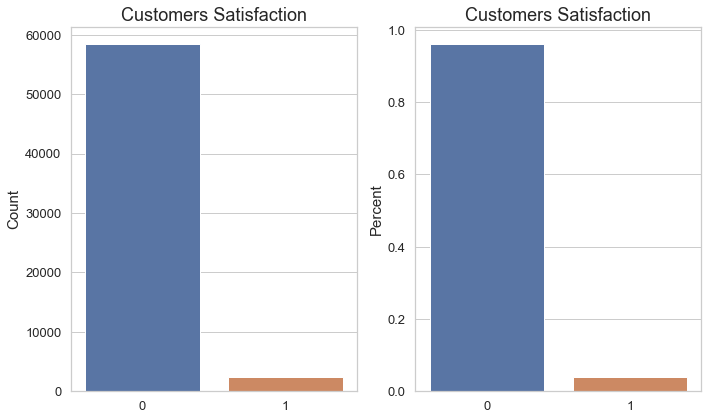

,Satisfaction,Total,Percent
0,0,58410,0.9604
1,1,2406,0.0396


In [27]:
# Agora, vamos plotar as contagens de observações e as proporções de cada classe da nossa variável target "Satisfaction":
ptlib.plot_percent_count_feature(df=train_df, feature='Satisfaction', plot_style='whitegrid',
                                 title='Customers Satisfaction', title_fontsize=18, title_share=False,
                                 xlabel1=None, xlabel1_fontsize=15, xlabel2=None, xlabel2_fontsize=15,
                                 ylabel_fontsize=15, columns_nr=2, rows_nr=1, share_x=False, share_y=False,
                                 width=10, height=6, xtick_labelsize=13, ytick_labelsize=13, wspace=0.3, hspace=None,
                                 figure_id='plot_percent_count_feature_satisfaction', figure_path=PROJECT_IMG_PATH,
                                 figure_file_format="png", figure_file_extension=".png", tight_layout=True, dpi=300
                                )

**Análise:**

1. A nossa variável target (**`Satisfaction`**) é uma variável do tipo `Categórica Nominal Binária`, ou seja, possui duas classes **`0`** e **`1`**;

2. Podemos observar no gráfico acima, que **`96%`** dos clientes **"ESTÃO SATISFEITOS"** (classe igual a **`0`**) com a sua experiência bancária, e que apenas **`4%`** dos clientes **"NÃO ESTÃO SATISFEITOS"** (classe igual a **`1`**) com a sua experiência bancária, ou seja, o nosso dataset **Não está Balanceado** (proporções iguais ou próximas de cada "classe"). Portanto, na próxima etapa (**04-Preprocessing**) vamos realizar o balanceamento do nosso dataset.

## 04- Resumindo as informações (`objetos`) importantes:

In [28]:
# Resumo das features por tipo de informação:
print("Features Summary:")
print('     Binary: {}'.format(santander_feat_info.count(keys=['Binary'])))
print('    Ordinal: {}'.format(santander_feat_info.count(keys=['Ordinal'])))
print('Categorical: {}'.format(santander_feat_info.count(keys=['Categorical'])))
print('   Discrete: {}'.format(santander_feat_info.count(keys=['Discrete'])))
print(' Continuous: {}'.format(santander_feat_info.count(keys=['Continuous'])))
print('----------------')
print('      Total: {}'.format(santander_feat_info.count(keys=['Categorical', 'Binary', 'Ordinal', 'Discrete',
                                                              'Continuous'])))

print()
print("Features with missing values and outliers:")
print('     NaN: {}'.format(santander_feat_info.count(keys=['NaN'])))
print('Outliers: {}'.format(santander_feat_info.count(keys=['Outliers'])))

print()
print('Irrelevant features: {}'.format(santander_feat_info.count(keys=['Irrelevant'])))

Features Summary:
     Binary: 75
    Ordinal: 0
Categorical: 13
   Discrete: 134
 Continuous: 147
----------------
      Total: 369

Features with missing values and outliers:
     NaN: 0
Outliers: 18

Irrelevant features: 346


**Análise:**

1. A maior parte das features (**`76%`**) são do tipo `Quantitativas Discretas/Contínuas`;

2. Apenas **`23`** features são **`relevantes`** em nosso dataset, ou seja, serão analisadas na criação dos modelos preditivos;

3. Temos **`18`** features com valores extremos (**`Outliers`**).

Agora, vamos criar um novo objeto (`FeaturesInformations`), separando as features **`relevantes`** para facilitar a utilização destas features nas próximas etapas:

In [29]:
# Criando o objeto da classe "FeaturesInformations" onde armazenaremos os nomes das features analisadas,
# classificando por tipo de informação e separando as features "relevantes" das "irrelevantes" (Irrelevant):
info = ['Categorical', 'Binary', 'Ordinal', 'Discrete', 'Continuous', 'Outliers', 'NaN', 'Irrelevant']
santander_relevant_feat = dslib.FeaturesInformations(keys=info)

Builder called to create an object of class FeaturesInformations!
dict_keys(['Categorical', 'Binary', 'Ordinal', 'Discrete', 'Continuous', 'Outliers', 'NaN', 'Irrelevant'])


In [30]:
# Separado as features do tipo "Irrelevant" (irrelevantes):
irrelevant_features = santander_feat_info.get(key='Irrelevant')

# Loop for para separar as features "relevantes":
for k, v in santander_feat_info.items():
    if (k != "Irrelevant"):
        # Analisa cada elemento de "v":
        for feat in v:
            # Verifica se a feature (feat) é relevante:
            if (feat not in irrelevant_features):
                santander_relevant_feat.save(key=k, features=[feat])

# Salva as features "irrelevantes":
santander_relevant_feat.save(key='Irrelevant', features=irrelevant_features)

Resumindo as informações:

In [31]:
# Resumo das features "relevantes" por tipo de informação:
print("Relevant features:")
print('     Binary: {}'.format(santander_relevant_feat.count(keys=['Binary'])))
print('    Ordinal: {}'.format(santander_relevant_feat.count(keys=['Ordinal'])))
print('Categorical: {}'.format(santander_relevant_feat.count(keys=['Categorical'])))
print('   Discrete: {}'.format(santander_relevant_feat.count(keys=['Discrete'])))
print(' Continuous: {}'.format(santander_relevant_feat.count(keys=['Continuous'])))
print('----------------')
print('      Total: {}'.format(santander_relevant_feat.count(keys=['Categorical', 'Binary', 'Ordinal', 'Discrete',
                                                                  'Continuous'])))
print()
print("Features with missing values and outliers:")
print('     NaN: {}'.format(santander_relevant_feat.count(keys=['NaN'])))
print('Outliers: {}'.format(santander_relevant_feat.count(keys=['Outliers'])))

print()
print('Irrelevant features: {}'.format(santander_relevant_feat.count(keys=['Irrelevant'])))

print()
print("Counting (Total) of analyzed features: {}".format(santander_relevant_feat.count(keys=['Categorical', 'Binary', 'Ordinal',
                                                                                     'Discrete', 'Continuous', 'Irrelevant'])))

Relevant features:
     Binary: 1
    Ordinal: 0
Categorical: 4
   Discrete: 10
 Continuous: 8
----------------
      Total: 23

Features with missing values and outliers:
     NaN: 0
Outliers: 17

Irrelevant features: 346

Counting (Total) of analyzed features: 369


## 05- Salvando informações (`objetos`) importantes, encontradas nesta etapa:

Agora, vamos salvar os seguintes `objetos` importantes, que serão utilizados nas próximas etapas, saber:

1. **`feat_groupby_vars`:** dicionário com as features agrupadas por tipo de variável (var1, var2, var18, etc...);

2. **`vars_groupby_featcount`:** dicionário com as variáveis (var1, var2, var18, etc...) agrupadas por quantidade (contagem) de features (Feat_1, Feat_2, Feat_3, etc...);

3. **`santander_feat_info`:** dicionário com as principais informações sobre cada uma das features, ou seja, `tipo de variável`, valores ausentes (`NaN`), valores extremos (`Outliers`) e uma lista das variáveis que não são importantes para a criação dos modelos preditivos (`Drop`);

4. **`santander_relevant_feat`:** dicionário com as principais informações sobre cada uma das features **`Relevantes`**, ou seja, `tipo de variável`, valores ausentes (`NaN`), valores extremos (`Outliers`), e também separamos em uma lista as variáveis que são **`Irrelevantes`**, ou seja, que não serão analisadas para a criação dos modelos preditivos (`Irrelevant`).

In [32]:
# Salvando o objeto "feat_groupby_vars":
dslib.pickle_object_save (path=PROJECT_OBJ_PATH, file="feat_groupby_vars.pickle", object_name=feat_groupby_vars,
                          msg="The 'feat_groupby_vars' object has been successfully saved!")

# Salvando o objeto "vars_groupby_featcount":
dslib.pickle_object_save (path=PROJECT_OBJ_PATH, file="vars_groupby_featcount.pickle", object_name=vars_groupby_featcount,
                          msg="The 'vars_groupby_featcount' object has been successfully saved!")

# Salvando o objeto "santander_feat_info":
dslib.pickle_object_save (path=PROJECT_OBJ_PATH, file="santander_feat_info.pickle", object_name=santander_feat_info,
                          msg="The 'santander_feat_info' object has been successfully saved!")

# Salvando o objeto "santander_relevant_feat":
dslib.pickle_object_save (path=PROJECT_OBJ_PATH, file="santander_relevant_feat.pickle",
                          object_name=santander_relevant_feat,
                          msg="The 'santander_relevant_feat' object has been successfully saved!")

The 'feat_groupby_vars' object has been successfully saved!
The 'vars_groupby_featcount' object has been successfully saved!
The 'santander_feat_info' object has been successfully saved!
The 'santander_relevant_feat' object has been successfully saved!


## <font color='black'>FIM</font>